**Paso 1:**

Por favor, resume en una sola celda todas las funciones que aplicaste al DataFrame inicial y que concluya con la creación de un nuevo DataFrame para continuar con nuestro trabajo.

In [6]:
#usaremos las siguientes bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Aquí utilizaremos las funciones que aplicamos al dataframe original, basicamente lo que hicimos en la actividad 3.

In [5]:
#Tomamos la dirección del archivo.
url = 'https://raw.githubusercontent.com/RaulACortez/FisicaComputacional1/main/FisicaComputacional1/Actividad1/ClimatologiaDiariaSantaAna.txt'

#Definimos nombres para las columnas.
my_cols = ['Fecha', 'Precip', 'Evap', 'Tmax', 'Tmin']
df_dist = pd.read_csv(url, names=my_cols, encoding='cp1251', sep='\s+', header=None, skiprows=19, skipfooter=1, engine='python')

#Creamos una copia y conservamos el original.
df_work0 = df_dist.copy()

#reemplazamos los textos "Nulo" por espacio en blanco.
str_Nulo = 'Nulo'
df_work1 = df_work0.replace(to_replace=str_Nulo, value='', regex=True)

#Convertimos los valores de las variables ambientales a numeros flotantes.
cols_list = ['Precip', 'Evap', 'Tmax', 'Tmin']
for cols in cols_list:
  df_work1[cols] = pd.to_numeric(df_work1[cols], errors='coerce')

#Volveremos a hacer una copia.
df_work2 = df_work1.copy()

#Trabajamos con la variable "Fecha".
df_work2['Fecha']=pd.to_datetime(df_work2['Fecha'], dayfirst=True).copy()

#Añadimos las las columnas Año y Mes.
df_work2['Año'] = df_work2['Fecha'].dt.year
df_work2['Mes'] = df_work2['Fecha'].dt.month

#Definimos un nuevo DataFrame para el análisis de los datos meteorológicos.
df_datos = df_work2.copy()
df_datos.info()
print(df_datos.head())
print(df_datos.tail())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10772 entries, 0 to 10771
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Fecha   10772 non-null  datetime64[ns]
 1   Precip  10770 non-null  float64       
 2   Evap    8143 non-null   float64       
 3   Tmax    10708 non-null  float64       
 4   Tmin    10747 non-null  float64       
 5   Año     10772 non-null  int64         
 6   Mes     10772 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(2)
memory usage: 589.2 KB
       Fecha  Precip  Evap  Tmax  Tmin   Año  Mes
0 1969-01-02     0.0   NaN  22.0   2.0  1969    1
1 1969-01-03     0.0   NaN  17.0   2.0  1969    1
2 1969-01-04     0.0   NaN  15.0   3.0  1969    1
3 1969-01-06     0.0   NaN  19.0   1.0  1969    1
4 1969-01-07     0.0   NaN   NaN   0.0  1969    1
           Fecha  Precip  Evap  Tmax  Tmin   Año  Mes
10767 2016-04-26     0.0   NaN  23.0  13.0  2016    4
10768 2016-04-27 

**Paso 2:**

Crear Histogramas de las variables de Precipitación, Evaporación, Temperaturas Máxima y Mínima de el conjunto de datos que se están analizando (Función: sns.histplot()). Complementar en su caso con las gráficas de la función de densidad de probabilidad correspondiente (Función: sns.kdeplot())

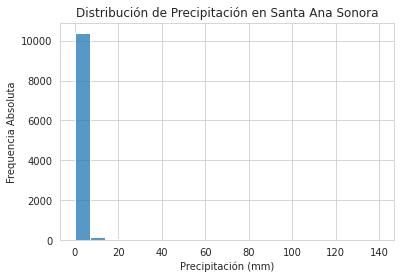

In [14]:
sns.set_style("whitegrid")
plt.xlabel('Precipitación (mm)')
plt.ylabel('Frequencia Absoluta')
plt.title('Distribución de Precipitación en Santa Ana Sonora')
sns.histplot(data=df_datos, x='Precip', bins=20);

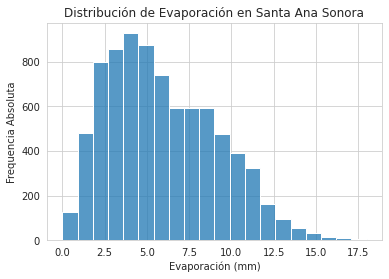

In [16]:
sns.set_style("whitegrid")
plt.xlabel('Evaporación (mm)')
plt.ylabel('Frequencia Absoluta')
plt.title('Distribución de Evaporación en Santa Ana Sonora')
sns.histplot(data=df_datos, x='Evap', bins=20);

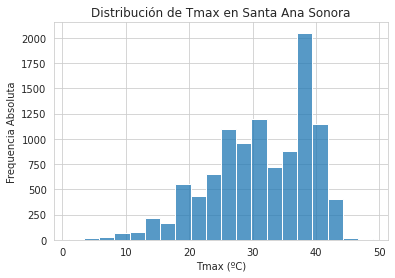

In [17]:
sns.set_style("whitegrid")
plt.xlabel('Tmax (ºC)')
plt.ylabel('Frequencia Absoluta')
plt.title('Distribución de Tmax en Santa Ana Sonora')
sns.histplot(data=df_datos, x='Tmax', bins=20);

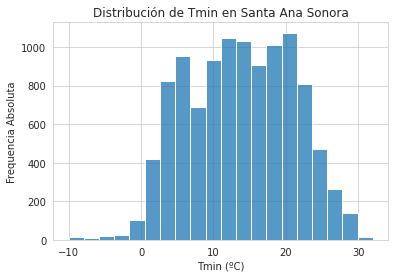

In [18]:
sns.set_style("whitegrid")
plt.xlabel('Tmin (ºC)')
plt.ylabel('Frequencia Absoluta')
plt.title('Distribución de Tmin en Santa Ana Sonora')
sns.histplot(data=df_datos, x='Tmin', bins=20);

**Paso 3:**

 Crear las gráficas de cajas (Boxplot) para la Evaporación, Temperaturas Máxima y Mínima (Función: sns.boxplot())

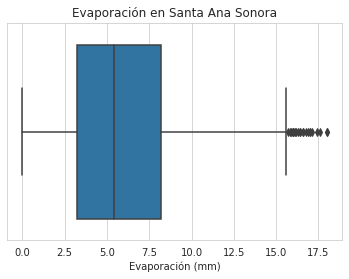

In [30]:
sns.set_style("whitegrid")

sns.boxplot(x=df_datos.Evap, data=df_datos, orient='h').set(xlabel='Evaporación (mm)', 
                                                     title='Evaporación en Santa Ana Sonora');

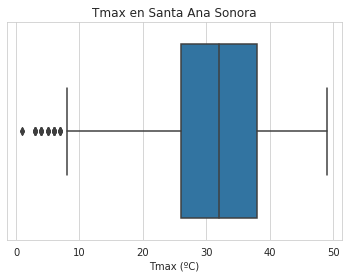

In [31]:
sns.set_style("whitegrid")

sns.boxplot(x=df_datos.Tmax, data=df_datos, orient='h').set(xlabel='Tmax (ºC)', 
                                                     title='Tmax en Santa Ana Sonora');

In [ ]:
sns.set_style("whitegrid")

sns.boxplot(x=df_datos.Tmin, data=df_datos, orient='h').set(xlabel='Tmin (ºC)', 
                                                     title='Tmin en Santa Ana Sonora');

**Paso 4:**

Produzca las gráficas de barras para la Precipitación agrupado por Años y después por meses (Función: sns.barplot())

In [41]:
df_69 = df_datos[(df_datos['Año'] >= 1969) & (df_datos['Año'] < 1986)]
df_86 = df_datos[(df_datos['Año'] >= 1986) & (df_datos['Año'] < 2016)]

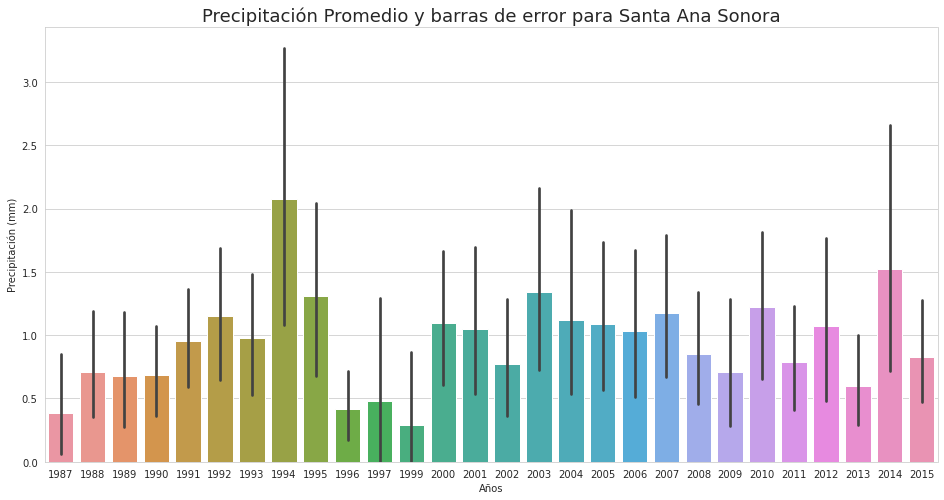

In [46]:
sns.set_style('whitegrid')
plt.figure(figsize=(16,8))

g=sns.barplot(x='Año', y='Precip', data=df_86);

plt.xlabel('Años')
plt.ylabel('Precipitación (mm)')
plt.title('Precipitación Promedio y barras de error para Santa Ana Sonora', fontsize=18)

plt.show()

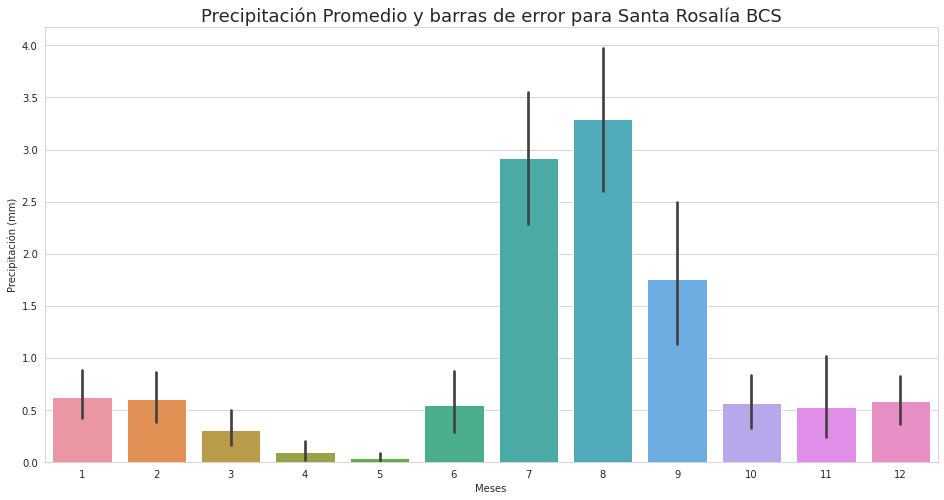

In [47]:
sns.set_style('whitegrid')
plt.figure(figsize=(16,8))

g=sns.barplot(x='Mes', y='Precip', data=df_86);

plt.xlabel('Meses')
plt.ylabel('Precipitación (mm)')
plt.title('Precipitación Promedio y barras de error para Santa Rosalía BCS', fontsize=18)

plt.show()

**Paso 5:**

Por favor cree una colección de los últimos 30 años de datos, utilizando condiciones de filtrado por un rango de años. Crear las gráficas de línea de la Precipitación, Temperaturas Máxima y Mínima como funciones del tiempo (Últimos 30 Años). (Función: sns.lineplot())

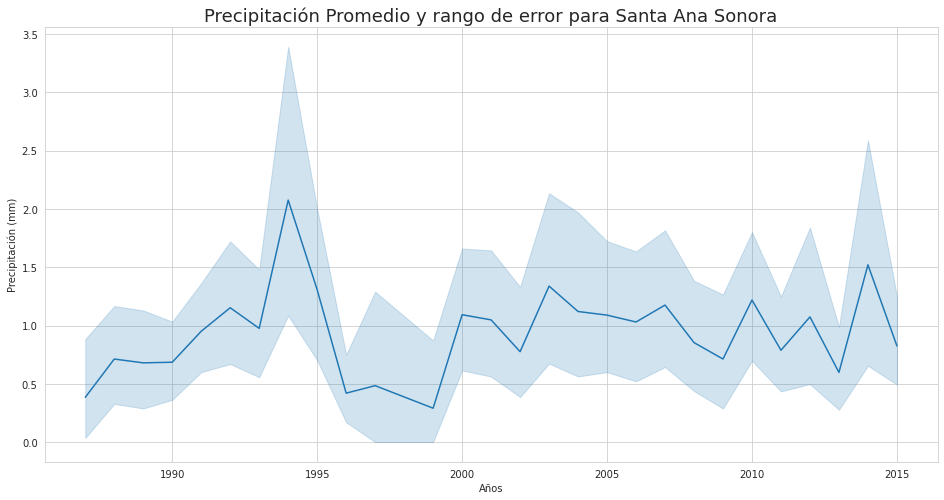

In [49]:
sns.set_style('whitegrid')
plt.figure(figsize=(16,8))

g=sns.lineplot(x='Año', y='Precip', data=df_86);

plt.xlabel('Años')
plt.ylabel('Precipitación (mm)')
plt.title('Precipitación Promedio y rango de error para Santa Ana Sonora', fontsize=18)

plt.show()

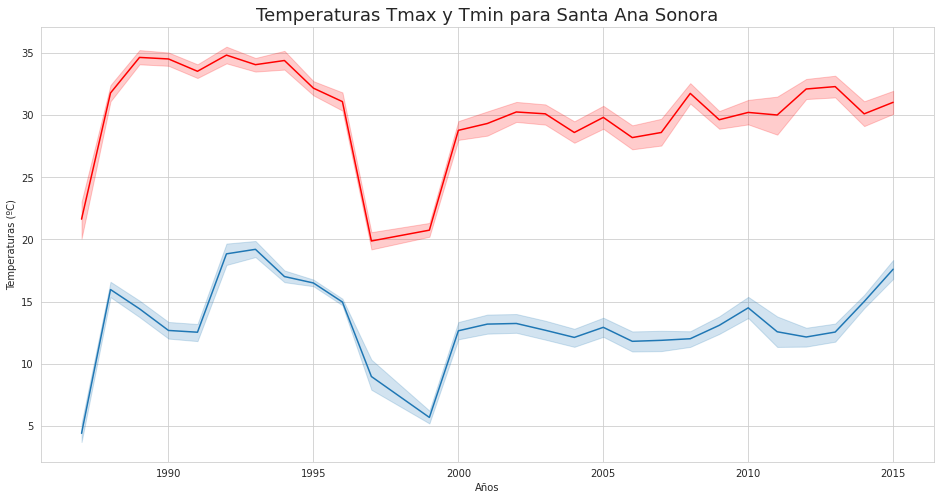

In [50]:
sns.set_style('whitegrid')
plt.figure(figsize=(16,8))

sns.lineplot(x='Año', y='Tmax', data=df_86, color='r');
sns.lineplot(x='Año', y='Tmin', data=df_86);

plt.xlabel('Años')
plt.ylabel('Temperaturas (ºC)')
plt.title('Temperaturas Tmax y Tmin para Santa Ana Sonora', fontsize=18)

plt.show()

**Paso 6:**

Con el conjunto de 30 años de datos, produzca diagramas de cajas (Función: sns.boxplot()) para observar la variabilidad de las Temperaturas (Max y Tmin) y la Evaporación agrupados por Mes.

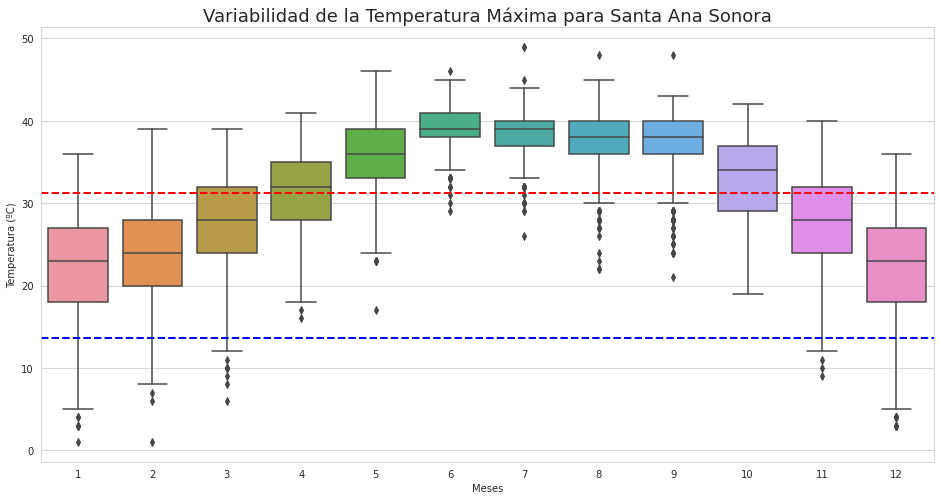

mean(Tmax) =  31.189531191632426
mean(Tmin) =  13.625997952917094
Diff Tmax_ave-Tmin_ave =  17.56353323871533


In [51]:
sns.set_style('whitegrid')
plt.figure(figsize=(16,8))

Tmax_ave = df_datos.Tmax.mean()
Tmin_ave = df_datos.Tmin.mean()

g=sns.boxplot(x='Mes', y='Tmax', data=df_86);
 
plt.axhline(Tmax_ave, color = 'r', linestyle='--', linewidth=2);
plt.axhline(Tmin_ave, color = 'b', linestyle='--', linewidth=2);

plt.xlabel('Meses')
plt.ylabel('Temperatura (ºC)')
plt.title('Variabilidad de la Temperatura Máxima para Santa Ana Sonora', fontsize=18)

plt.show()

print('mean(Tmax) = ', Tmax_ave)
print('mean(Tmin) = ', Tmin_ave)
print('Diff Tmax_ave-Tmin_ave = ', (Tmax_ave - Tmin_ave))

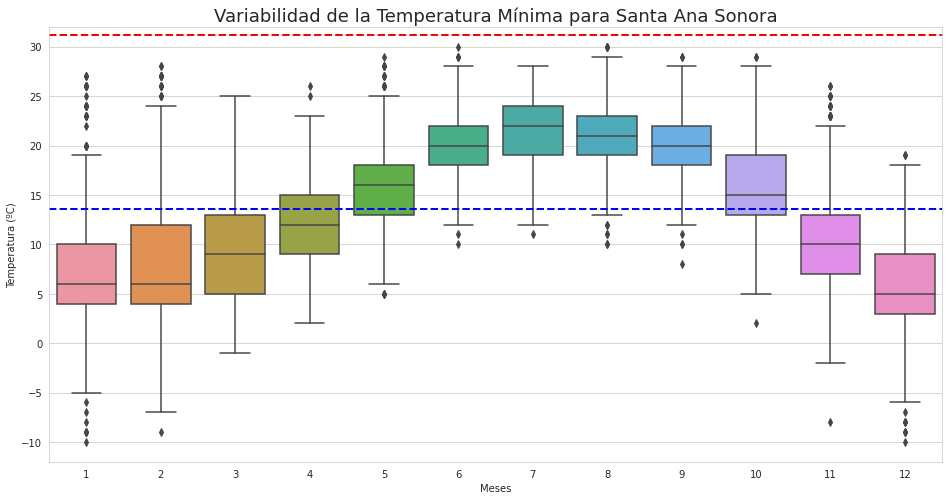

mean(Tmax) =  31.189531191632426
mean(Tmin) =  13.625997952917094
Diff Tmax_ave-Tmin_ave =  17.56353323871533


In [52]:
sns.set_style('whitegrid')
plt.figure(figsize=(16,8))

Tmax_ave = df_datos.Tmax.mean()
Tmin_ave = df_datos.Tmin.mean()

g=sns.boxplot(x='Mes', y='Tmin', data=df_86);

plt.axhline(Tmax_ave, color = 'r', linestyle='--', linewidth=2);
plt.axhline(Tmin_ave, color = 'b', linestyle='--', linewidth=2);

plt.xlabel('Meses')
plt.ylabel('Temperatura (ºC)')
plt.title('Variabilidad de la Temperatura Mínima para Santa Ana Sonora', fontsize=18)

plt.show()

print('mean(Tmax) = ', Tmax_ave)
print('mean(Tmin) = ', Tmin_ave)
print('Diff Tmax_ave-Tmin_ave = ', (Tmax_ave - Tmin_ave))

La gráfica de Boxplot no brinda información de la precipitación por mes.

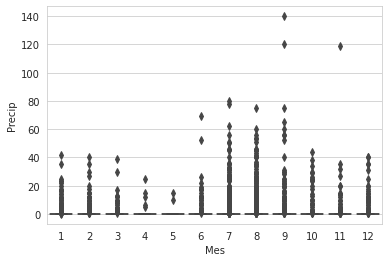

In [53]:
sns.boxplot(x='Mes' , y='Precip', data=df_86);